In [138]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [139]:
def read_stats(rootdir):
    stat_files = []

    for file in os.listdir(rootdir):
        stat_files.append(os.fsdecode(rootdir + '/' + file))

    print(stat_files)
    raw_stats = []
    for file in stat_files:
        raw_stats.append(pickle.load(open(file, 'rb')))

    scores, survived, reward, time, steps = {}, {}, {}, {}, {}

    statistics = {}

    #N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])
    N_gen = 100*int(stat_files[0][-18]) + 10*int(stat_files[0][-17]) + int(stat_files[0][-16])

    for gen in raw_stats:
        gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

        for ep in gen[0]:
            gen_score = np.append(gen_score, ep['score'])
            # gen_survived = np.append(gen_survived, ep['alive'])
            if ep['steps'] < 400:
                gen_survived = np.append(gen_survived, False)
            else:
                gen_survived = np.append(gen_survived, True)
            gen_reward = np.append(gen_reward, ep['reward'])
            gen_time = np.append(gen_time, ep['mean_time'])
            gen_steps = np.append(gen_steps, ep['steps'])

        scores[N_gen] = gen_score
        survived[N_gen] = gen_survived
        reward[N_gen] = gen_reward
        time[N_gen] = gen_time
        steps[N_gen] = gen_steps
        N_gen += 1
    
    return scores, survived, reward, time, steps

In [140]:
def get_xy(dictionary):
    y = []
    x = []
    for gen, val in dictionary.items():
        x.append(gen)
        y.append(np.mean(val))
    
    return x,y

In [141]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_mlp')
scores1, survived1, reward1, time1, steps1 = read_stats(rootdir)
label1 = "mlp"

['agent_code/my_agent/Training_data/statistics_mlp/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/009_statistics.txt']


In [142]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_10_s_532')
scores2, survived2, reward2, time2, steps2 = read_stats(rootdir)
label2 = "forest, gamma=1.0, simple agents, 532 states"

['agent_code/my_agent/Training_data/statistics_10_s_532/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/012_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/013_statistics.txt', 'agent_code

In [143]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_09_r_532')
scores3, survived3, reward3, time3, steps3 = read_stats(rootdir)
label3 = "forest, gamma=0.9, random agents, 532 states"

['agent_code/my_agent/Training_data/statistics_09_r_532/000_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/012_statistics.txt', 'agent_code

In [144]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_09_s_532')
scores4, survived4, reward4, time4, steps4 = read_stats(rootdir)
label4 = "forest, gamma=0.9, simple agents, 532 states"

['agent_code/my_agent/Training_data/statistics_09_s_532/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/012_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/013_statistics.txt', 'agent_code

In [145]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')
scores5, survived5, reward5, time5, steps5 = read_stats(rootdir)
label5 = "forest, gamma=0.9, simple agents, 180 states"

['agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics/005_statistics.txt']


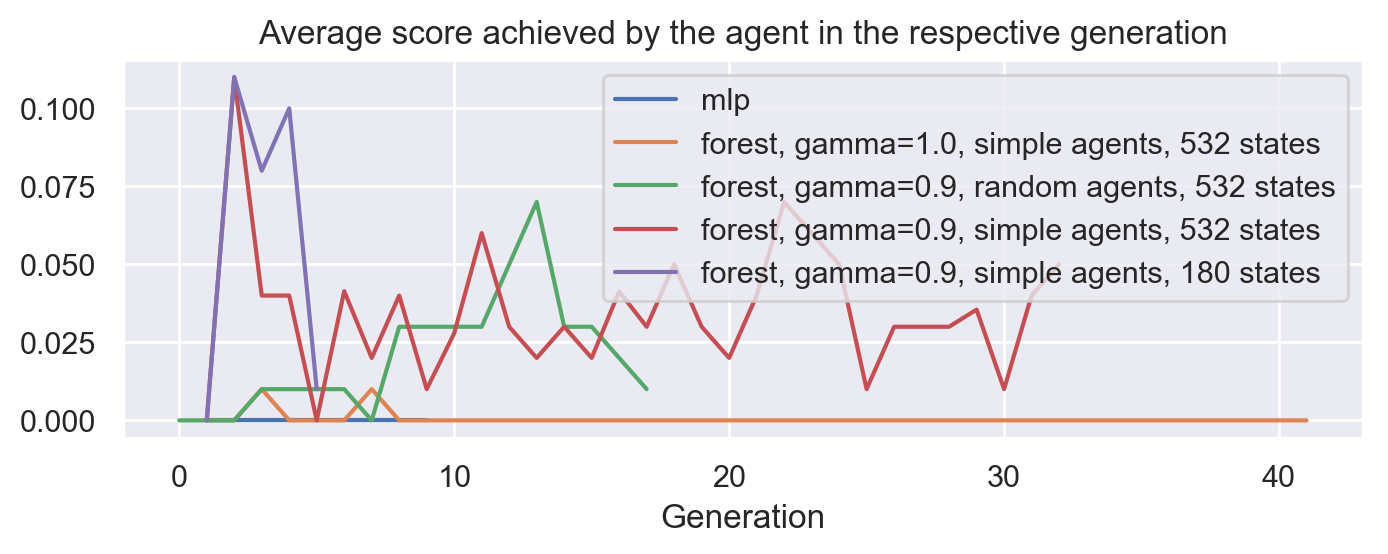

In [146]:
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average score achieved by the agent in the respective generation')

x1, y1 = get_xy(scores1)
x2, y2 = get_xy(scores2)
x3, y3 = get_xy(scores3)
x4, y4 = get_xy(scores4)
x5, y5 = get_xy(scores5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

In [147]:
print(y2)

[0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


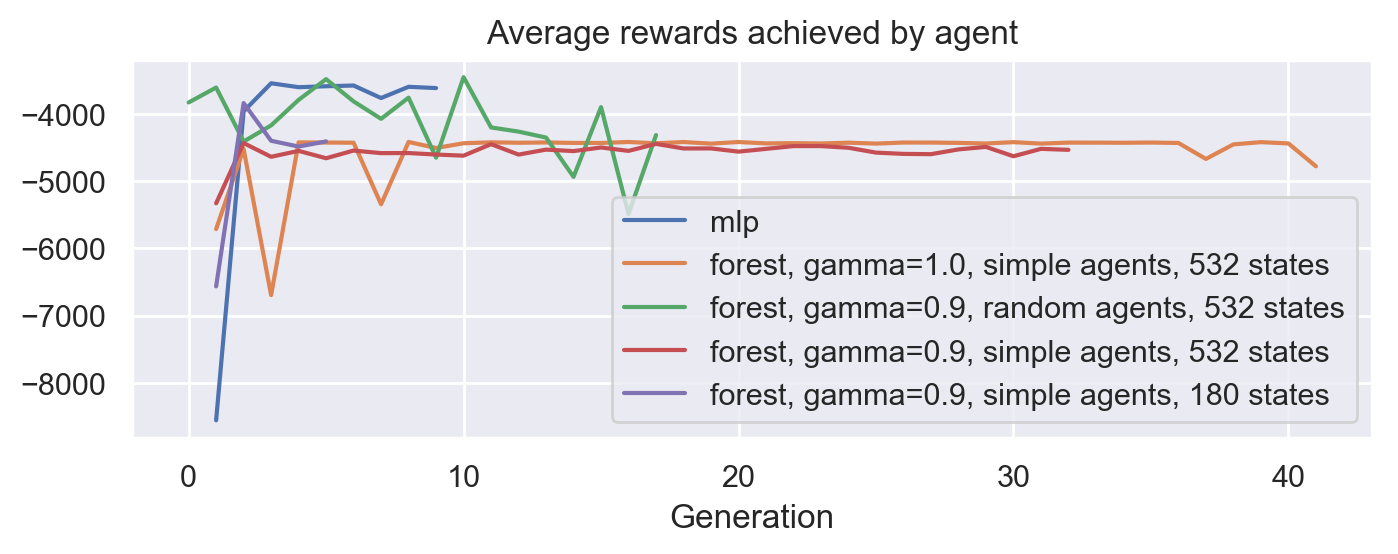

<Figure size 432x288 with 0 Axes>

In [148]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average rewards achieved by agent')

x1, y1 = get_xy(reward1)
x2, y2 = get_xy(reward2)
x3, y3 = get_xy(reward3)
x4, y4 = get_xy(reward4)
x5, y5 = get_xy(reward5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()
plt.savefig("LaTex/images/mlp_vs_forest_gamma_1.0.png")

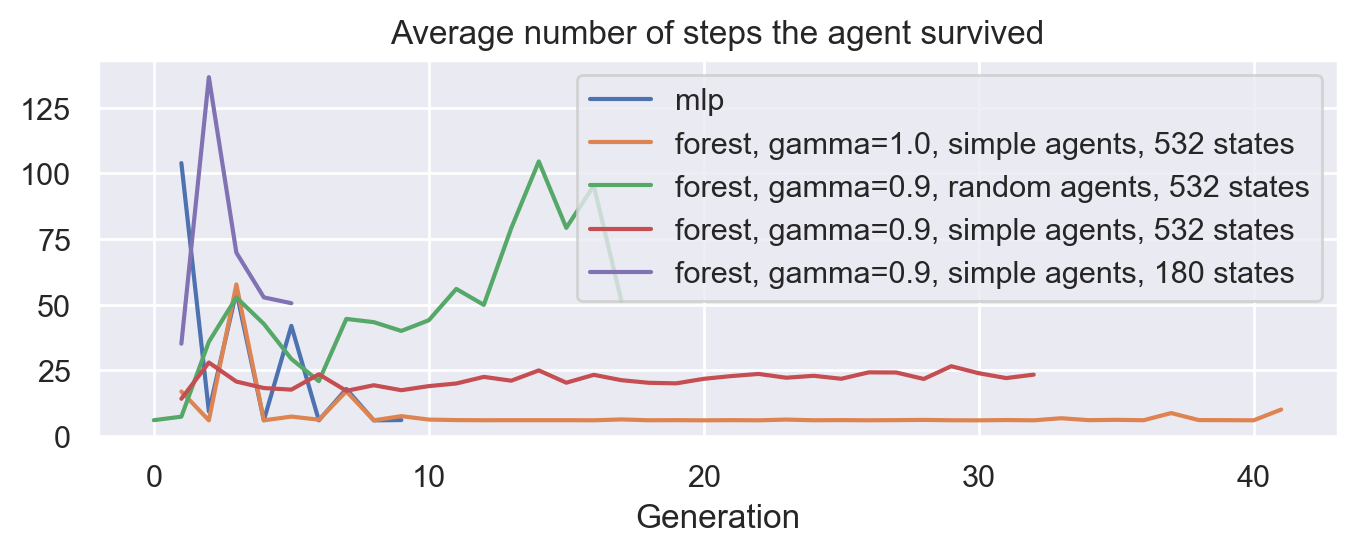

In [149]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average number of steps the agent survived')

x1, y1 = get_xy(steps1)
x2, y2 = get_xy(steps2)
x3, y3 = get_xy(steps3)
x4, y4 = get_xy(steps4)
x5, y5 = get_xy(steps5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

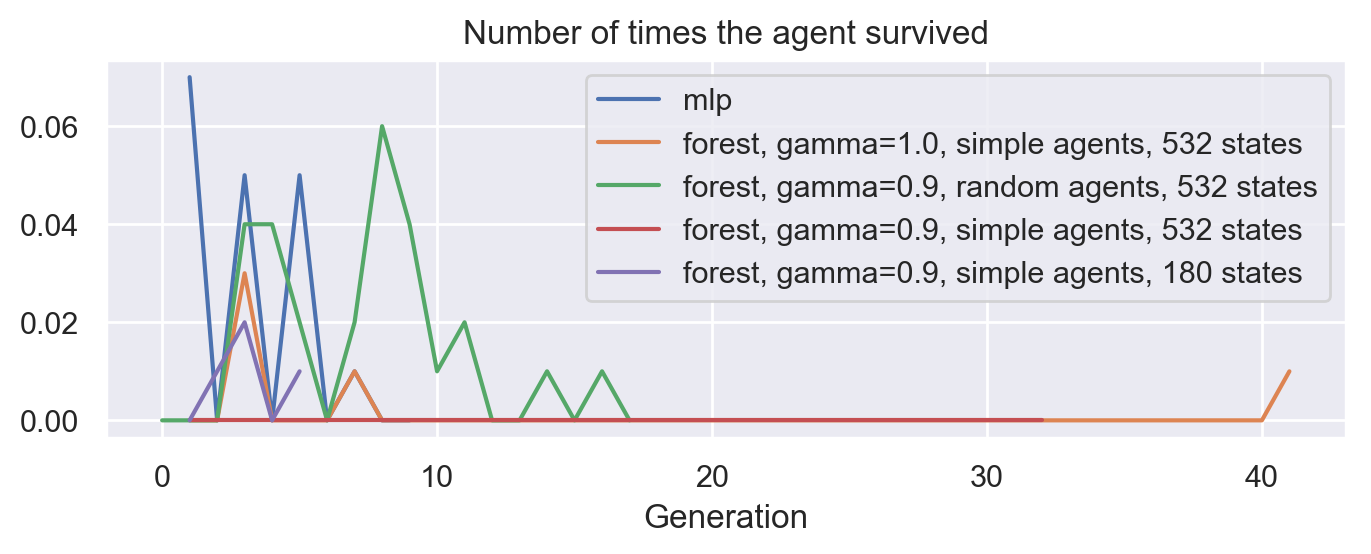

In [150]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Number of times the agent survived')

x1, y1 = get_xy(survived1)
x2, y2 = get_xy(survived2)
x3, y3 = get_xy(survived3)
x4, y4 = get_xy(survived4)
x5, y5 = get_xy(survived5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

In [151]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files[-5])
regressor_BOMB = pickle.load(open(stat_files[-6], 'rb'))
regressor_DOWN = pickle.load(open(stat_files[-5], 'rb'))
regressor_LEFT = pickle.load(open(stat_files[-4], 'rb'))
regressor_RIGHT = pickle.load(open(stat_files[-3], 'rb'))
regressor_UP = pickle.load(open(stat_files[-2], 'rb'))
regressor_WAIT = pickle.load(open(stat_files[-1], 'rb'))
print('regressors loaded')

agent_code/my_agent/Training_data/trees/012_DOWN.txt
regressors loaded


C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from vers

In [152]:
print(np.argsort(regressor_BOMB.feature_importances_))
print(np.argsort(regressor_WAIT.feature_importances_))

[178  74  76  78  88 124 149 116  68  45  28 130 100  12 125  56 122  99
   3  50  11 146 107 111 117 103  87  85 135  31 162  96 121  73 109  81
   1  27  52  66  95 108 168 128 120 147  59  33 138 104   6 118  82  70
 101  77 169  47  32 144 102 142 105  58 134  39 152 170 123 137 157 136
  19  93  83  61  57  91  55  80  90 145  29  23 173 115  51  64  17  65
 133 156  54 129 119  67 148  48 165 163 166  94 143 127  63 113  20  69
 141  98  18 150  92 159 164 112   5 126  89  25 114 174 158 167  49  60
 171  84 140  34  86 160 153 132  30  43  53  26   8  79  38  37  15  13
 155  22 154 151  16   2 139  24  36  14   0 175 161 179 106 131  42  35
  62   7  21  72 172  40  75  71 110  41   9  46  44  97  10   4 177 176]
[178  65  87 100 101 124  42 147  96  76 143  89  52  72 146  53 119  80
 127  98 168  95 117  43 136  75 111  51  29  94 148  19  74  64  28  67
 155 122  85  73  63  91 156 131  49  71   4  62 105  82  27  50  61 132
  93 110 167 152   8 130  44 121  34  23 138  70  

In [153]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
